Utilice la base de datos radar_muestras.csv de la actividad anterior para entrenar una neurona no lineal que clasifique los datos de ambas rutas aéreas. ¿Qué diferencias observa en el resultado comparado con el conseguido con el perceptrón? 

In [37]:
import numpy as np
import pandas as pd

from numpy import genfromtxt
from adaline import train, plot
from sklearn import preprocessing

In [41]:
radares_desconocidos = pd.read_csv('../Practica 1/radar_muestras.csv', encoding = 'iso-8859-1', sep = ";")
radares_desconocidos.columns = ['x', 'y', 'label']
radares_desconocidos.head()

,x,y,label
0,3.842974,5.199115,0
1,3.973236,5.530973,0
2,4.877401,3.672566,0
3,4.854414,3.628319,0
4,3.911936,4.800885,0


In [43]:
x = radares_desconocidos[['x','y']].values #returns a numpy array

# Normalizo los valores
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled)
df['label'] = radares_desconocidos['label']
df.columns = radares_desconocidos.columns

1 [0.61705998]


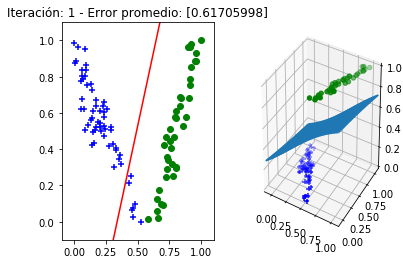

2 [0.20133651]


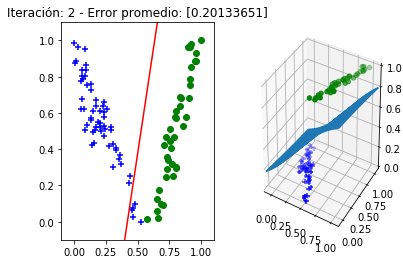

3 [0.13799197]


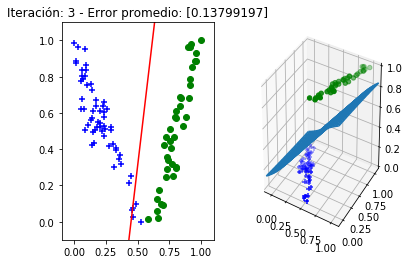

4 [0.11127034]


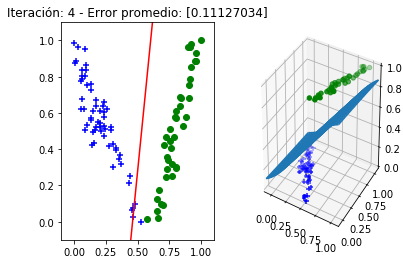

5 [0.09648867]


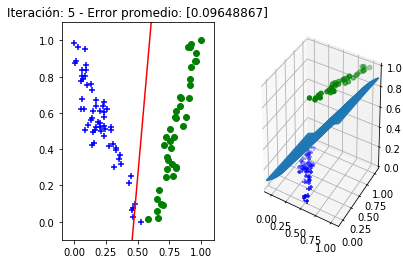

6 [0.0868684]


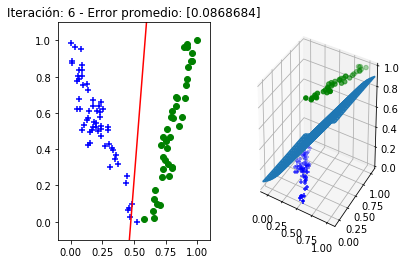

7 [0.07995605]


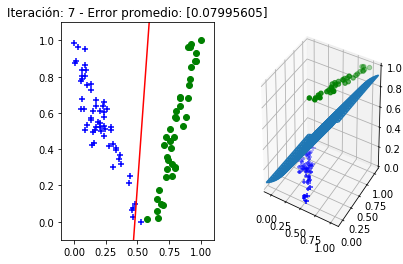

8 [0.07465639]


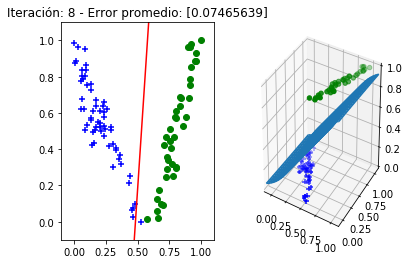

9 [0.07040518]


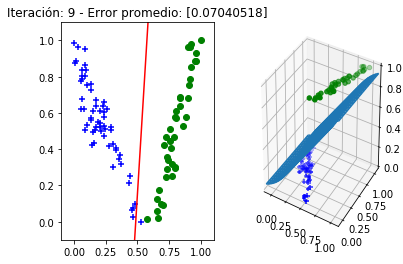

10 [0.06688108]


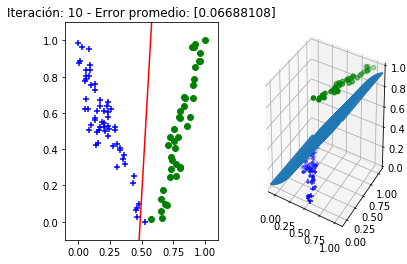

11 [0.06388687]


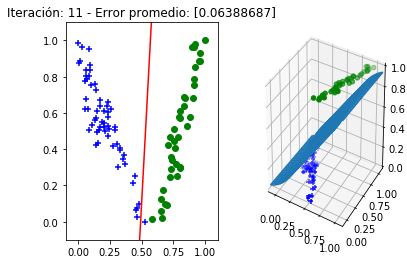

12 [0.06129425]


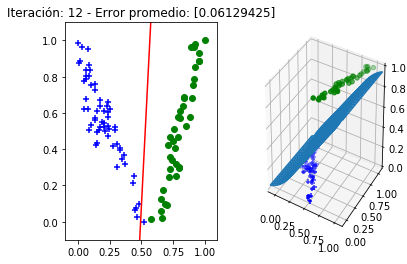

13 [0.05901569]


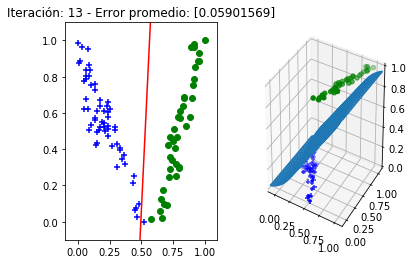

14 [0.0569891]


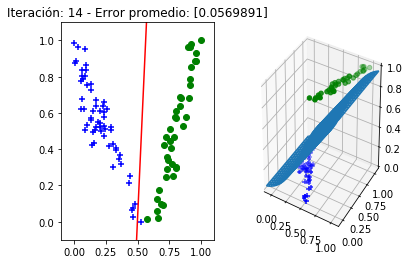

15 [0.05516897]


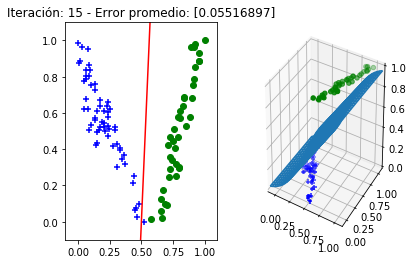

16 [0.05352097]


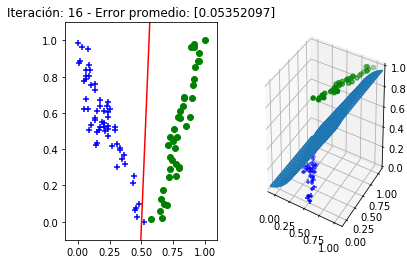

17 [0.0520186]


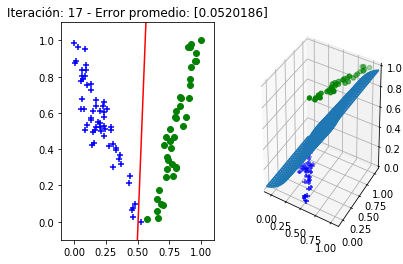

18 [0.05064095]


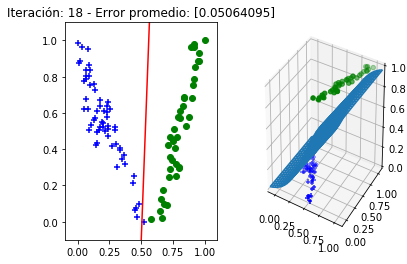

19 [0.04937126]


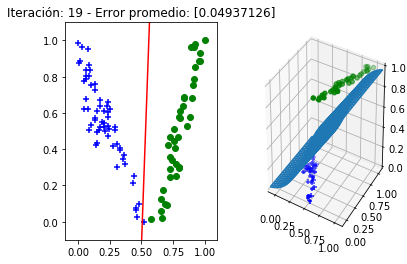

20 [0.04819588]


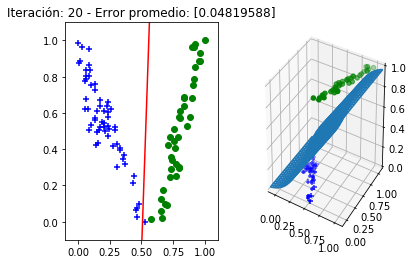

21 [0.04710351]


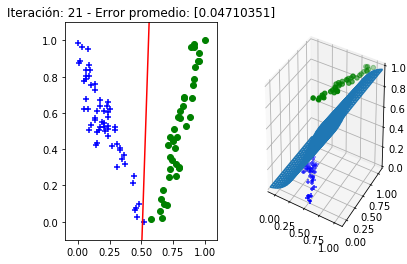

22 [0.04608473]


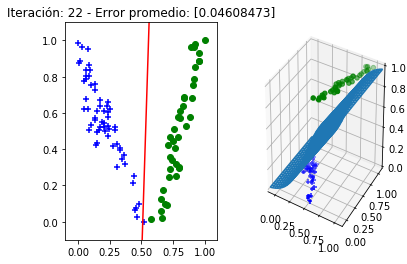

23 [0.0451316]


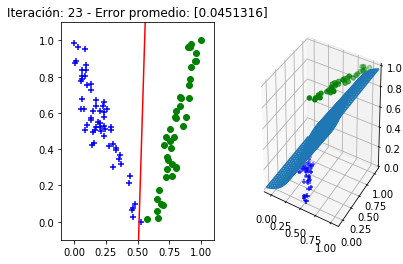

24 [0.04423732]


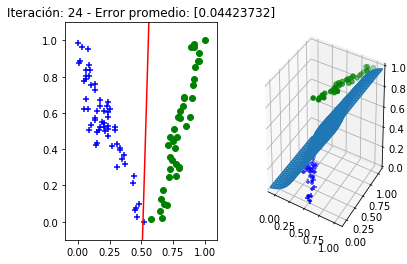

25 [0.04339609]


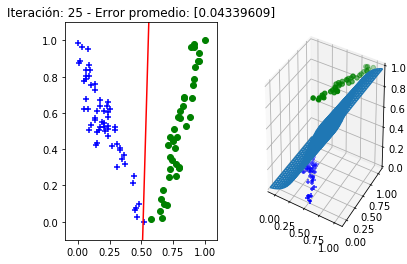

26 [0.04260286]


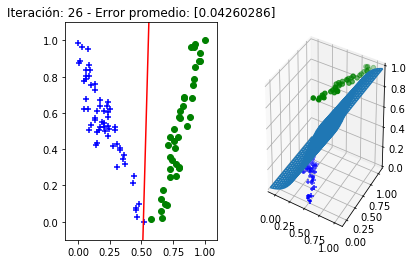

27 [0.04185326]


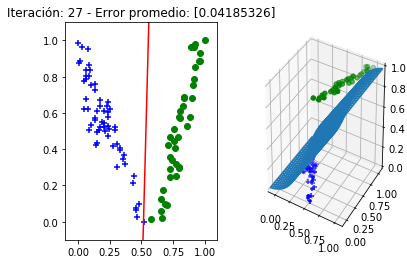

28 [0.04114346]


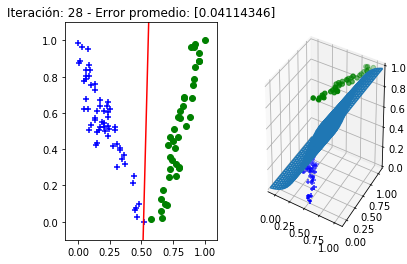

29 [0.04047007]


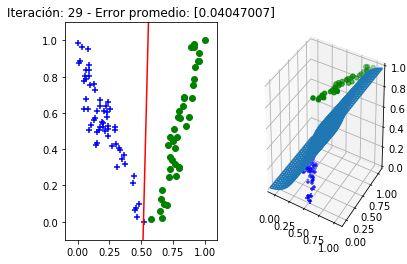

30 [0.03983011]


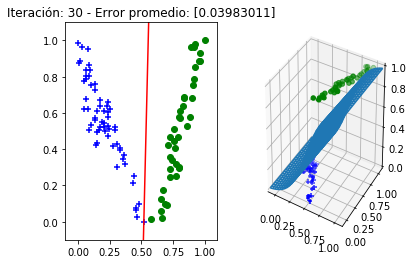

In [44]:
P = df[['x','y']].values
T = df[['label']].values

alfa = 0.1
max_ite = 30
cota = 0.00001

funcion = 'tansig'
T = T * 2 - 1 # por ser tansig los lleva a -1 y 1
(W, b, ite, error_prom) = train(P, T, alfa, max_ite, cota, funcion, True)

La recta es lo más vertical posible, como en el caso del perceptron cuando se inicializa de manera especial. Tiene una ligera pendiente y oscila verticalmente hasta llegar al resultado.

¿Qué sucede al presentarle a la neurona no lineal los datos del dataset radar_desconocidos?

In [46]:
radares_desconocidos = pd.read_csv('../Practica 1/radar_desconocidos.csv', encoding = 'iso-8859-1', sep = ";")
radares_desconocidos.columns = ['x', 'y']
radares_desconocidos.head()

,x,y
0,3.923624,6.592920
1,4.127522,6.172566
2,4.410382,5.575221
3,4.559605,5.132743
4,5.444420,4.469027


In [47]:
radares_desconocidos = radares_desconocidos.copy()
radares_desconocidos['W1'] = W[0][0]
radares_desconocidos['W2'] = W[0][1]
radares_desconocidos['bias'] = b[0]

In [48]:
radares_desconocidos['salida'] =  radares_desconocidos['bias'] +((radares_desconocidos['W1'] * radares_desconocidos['x']) +
                                          (radares_desconocidos['W2'] * radares_desconocidos['y']))

radares_desconocidos['Pred'] = 0
radares_desconocidos.loc[radares_desconocidos['salida']>=0, 'Pred'] = 1
radares_desconocidos.head()

,x,y,W1,W2,bias,salida,Pred
0,3.923624,6.592920,6.948035,-0.240036,-3.608222,22.070719,1
1,4.127522,6.172566,6.948035,-0.240036,-3.608222,23.588310,1
2,4.410382,5.575221,6.948035,-0.240036,-3.608222,25.697015,1
3,4.559605,5.132743,6.948035,-0.240036,-3.608222,26.840032,1
4,5.444420,4.469027,6.948035,-0.240036,-3.608222,33.147076,1


 Supuestamente se clasifican bien por como queda la respuesta que es bastante vertical.